<a href="https://colab.research.google.com/github/hikinegi/Animation-Face/blob/master/delhi_air.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.City.value_counts().to_dict()

{'Ahmedabad': 2009,
 'Aizawl': 113,
 'Amaravati': 951,
 'Amritsar': 1221,
 'Bengaluru': 2009,
 'Bhopal': 289,
 'Brajrajnagar': 938,
 'Chandigarh': 304,
 'Chennai': 2009,
 'Coimbatore': 386,
 'Delhi': 2009,
 'Ernakulam': 162,
 'Gurugram': 1679,
 'Guwahati': 502,
 'Hyderabad': 2006,
 'Jaipur': 1114,
 'Jorapokhar': 1169,
 'Kochi': 162,
 'Kolkata': 814,
 'Lucknow': 2009,
 'Mumbai': 2009,
 'Patna': 1858,
 'Shillong': 310,
 'Talcher': 925,
 'Thiruvananthapuram': 1112,
 'Visakhapatnam': 1462}

In [ ]:
df=df.loc[df['City']=='Delhi']

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


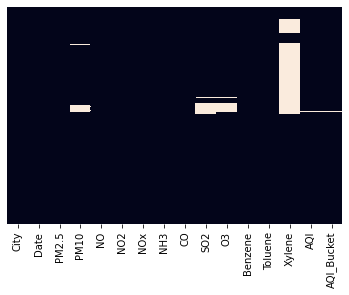

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df=df.reset_index(drop=True) #reset index
df=df.drop(columns=['City','Xylene','Date','AQI_Bucket']) #dropping unwanted columns
df=df.dropna() #dropping all na values

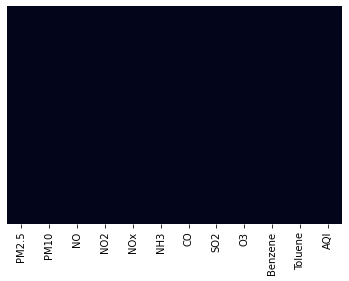

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) #checking null values 

In [ ]:
df.to_csv('delhiaqi.csv') #saving the data to csv file

In [ ]:
df.head(0)

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI


In [ ]:
X=df.iloc[:,:-1] #independent function
y=df.iloc[:,-1] #dependent function

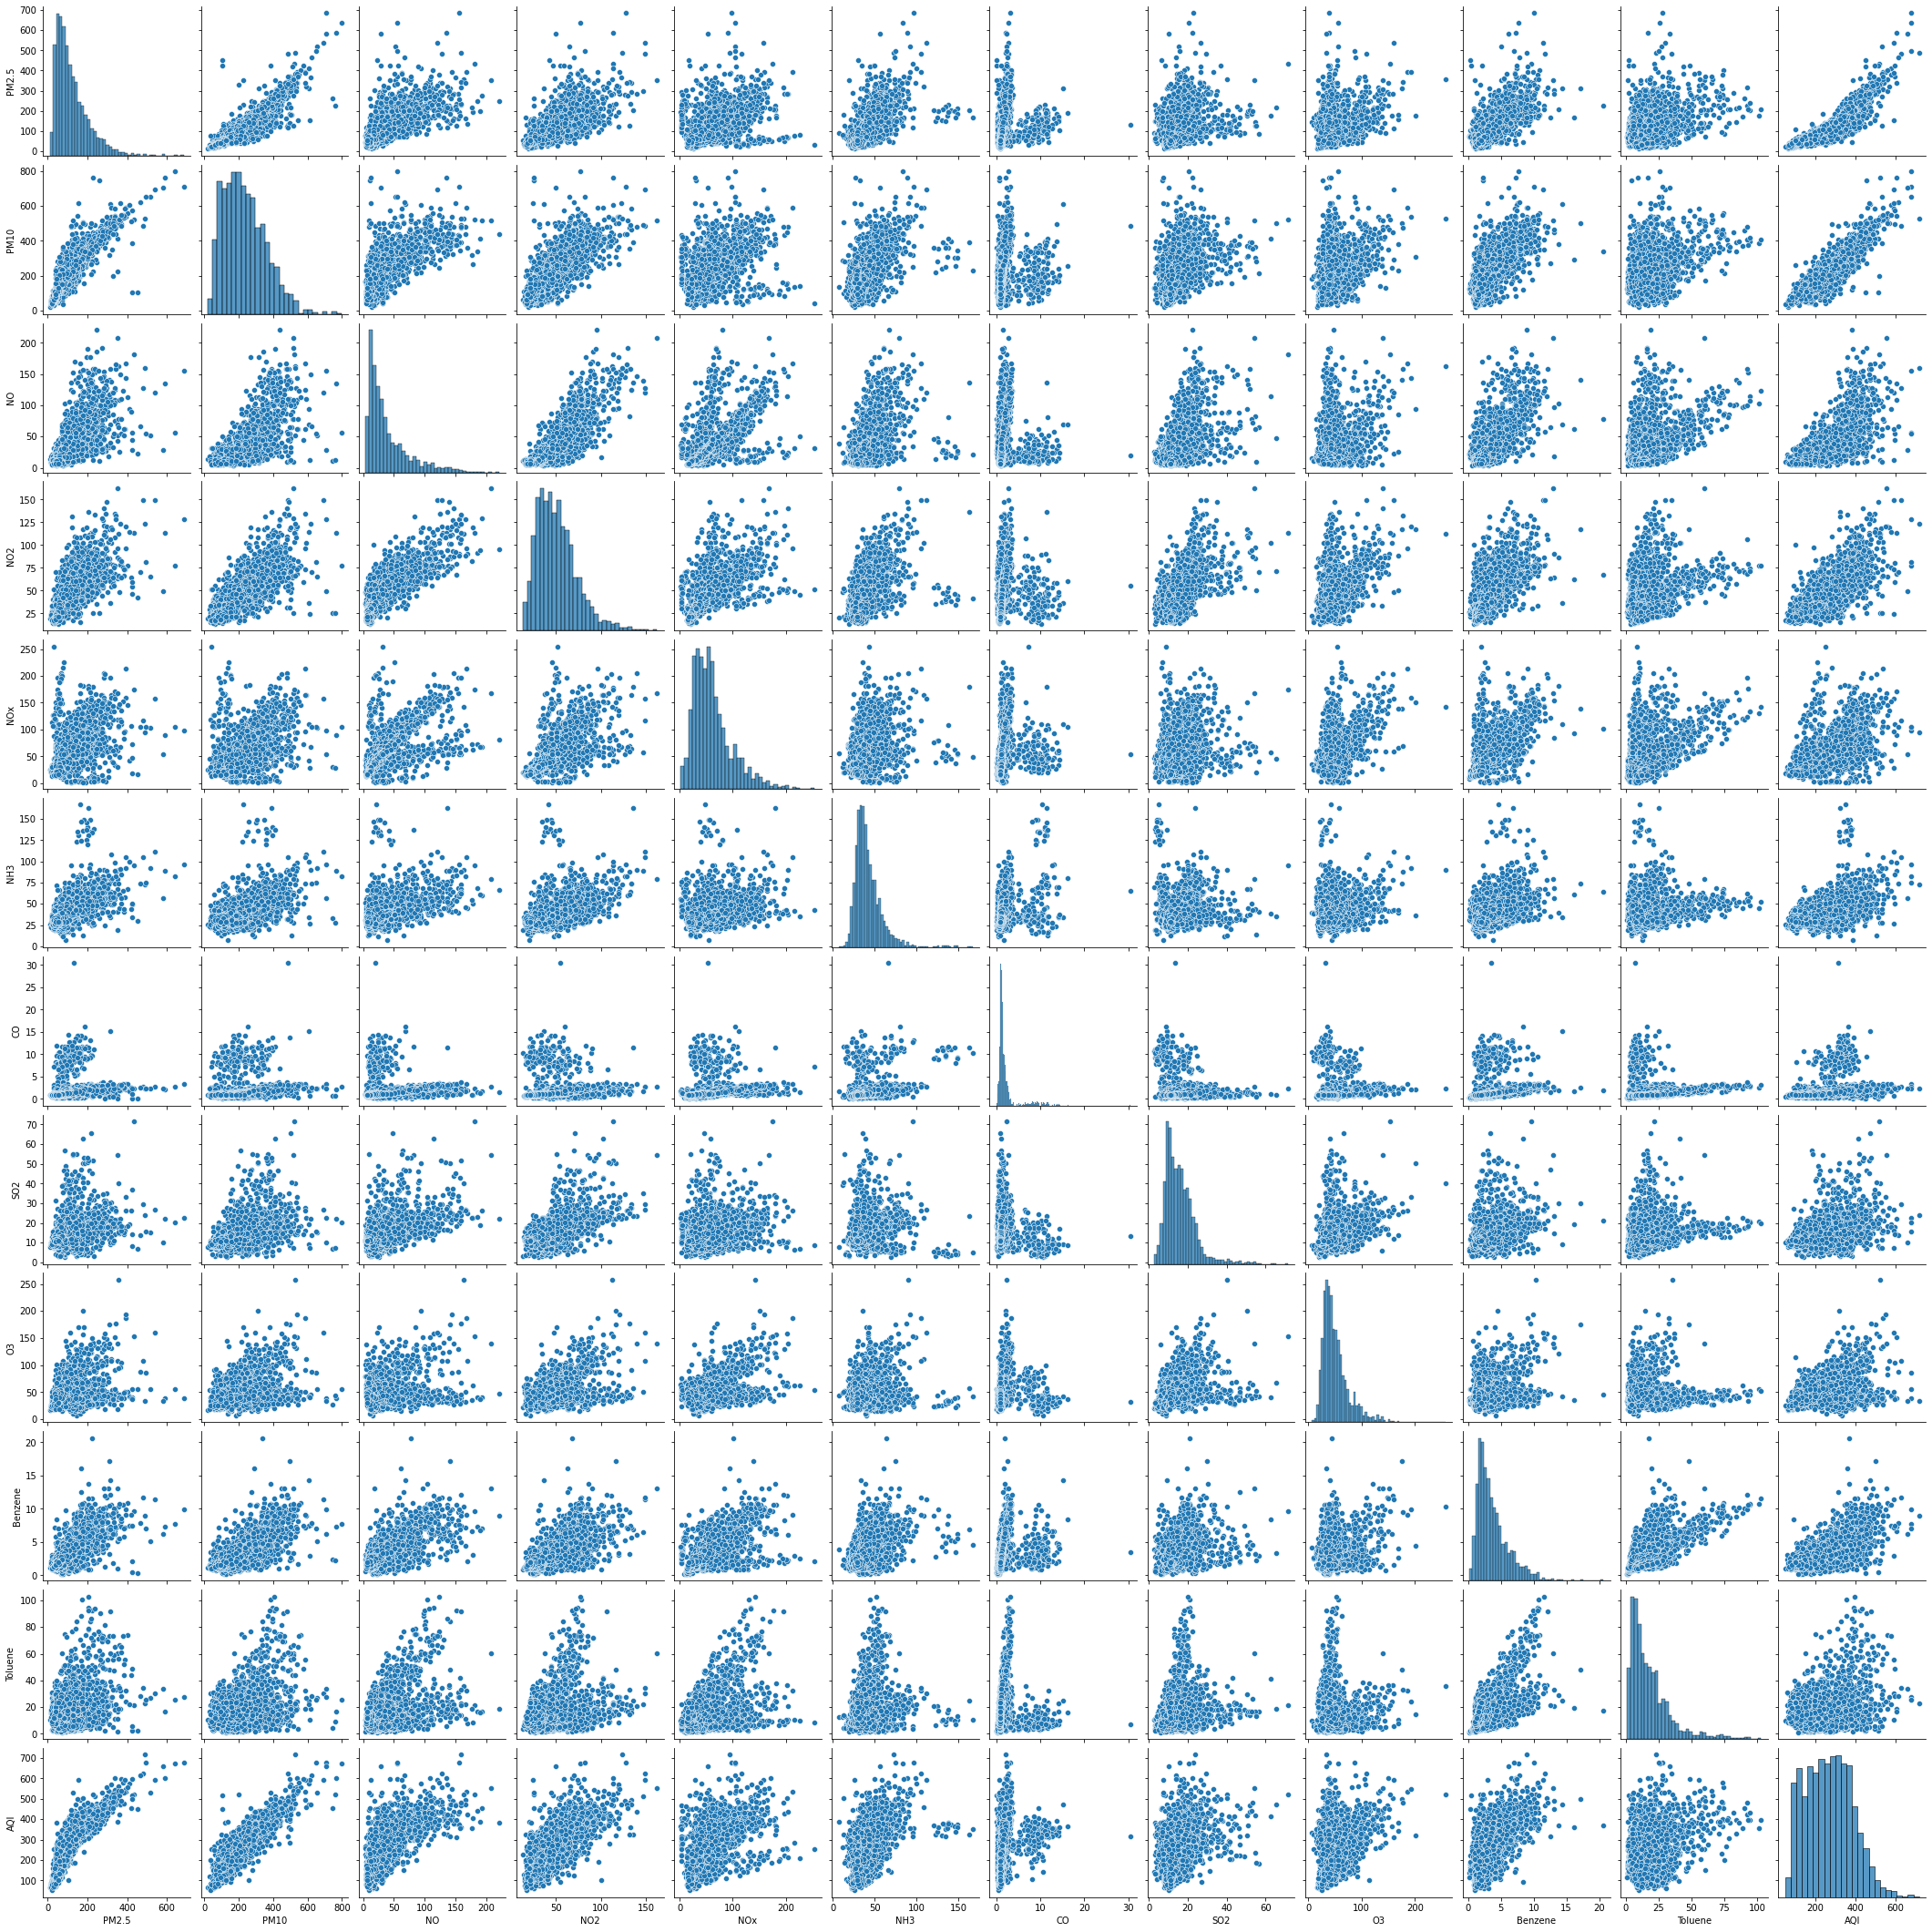

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.860408,0.675402,0.678962,0.451978,0.590173,0.140731,0.367818,0.245990,0.681759,0.320006,0.882562
PM10,0.860408,1.000000,0.700674,0.726422,0.478067,0.525891,0.114728,0.461959,0.298822,0.661061,0.302346,0.892077
NO,0.675402,0.700674,1.000000,0.810953,0.586192,0.453975,0.000309,0.525724,0.211185,0.678847,0.404096,0.665114
NO2,0.678962,0.726422,0.810953,1.000000,0.614395,0.482503,0.002804,0.621396,0.433166,0.598680,0.215843,0.711935
NOx,0.451978,0.478067,0.586192,0.614395,1.000000,0.305537,0.115656,0.246259,0.467865,0.578638,0.339963,0.505677
NH3,0.590173,0.525891,0.453975,0.482503,0.305537,1.000000,0.309838,0.108836,0.143733,0.436182,0.091850,0.531589
CO,0.140731,0.114728,0.000309,0.002804,0.115656,0.309838,1.000000,-0.170537,-0.027086,0.166886,-0.043626,0.247360
SO2,0.367818,0.461959,0.525724,0.621396,0.246259,0.108836,-0.170537,1.000000,0.318913,0.353202,0.111421,0.413813
O3,0.245990,0.298822,0.211185,0.433166,0.467865,0.143733,-0.027086,0.318913,1.000000,0.223509,-0.129268,0.319286
Benzene,0.681759,0.661061,0.678847,0.598680,0.578638,0.436182,0.166886,0.353202,0.223509,1.000000,0.597714,0.635288


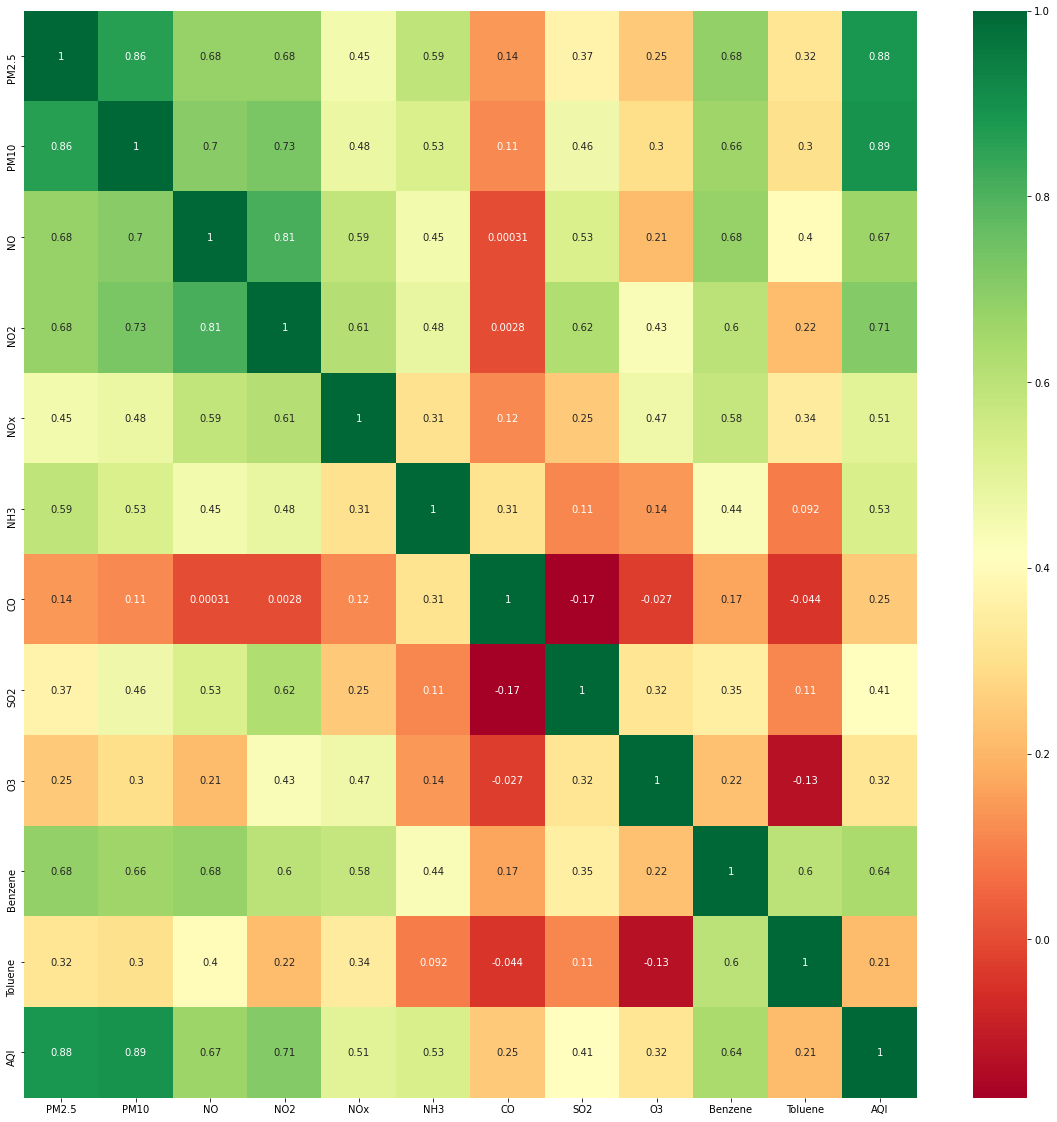

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
y.head()

0    472.0
1    454.0
2    143.0
3    319.0
4    325.0
Name: AQI, dtype: float64

In [ ]:
print(model.feature_importances_)

[0.37084033 0.37196979 0.0553658  0.06899569 0.01649863 0.02151005
 0.03539185 0.0089258  0.01418041 0.02552016 0.01080149]


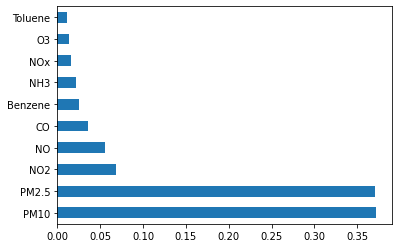

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


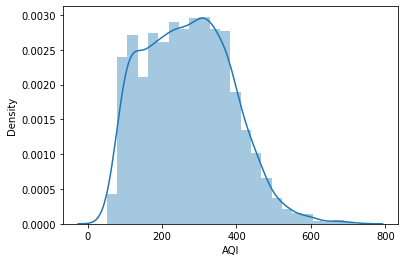

In [ ]:
sns.distplot(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.881761949356033


In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(x_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.8759223032246058


In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [ ]:
score.mean()

0.8062692475659035

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df
# valu

,Coefficient
PM2.5,0.656634
PM10,0.432276
NO,0.022241
NO2,0.304080
NOx,0.234323
NH3,-0.556491
CO,6.563104
SO2,0.383849
O3,0.042102
Benzene,-0.175670


In [ ]:
prediction=regressor.predict(x_test)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


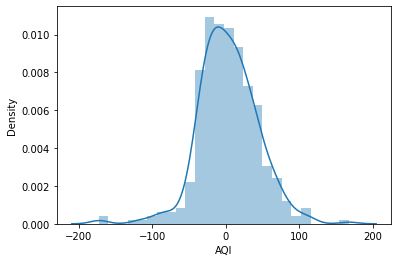

In [ ]:
sns.distplot(y_test-prediction)

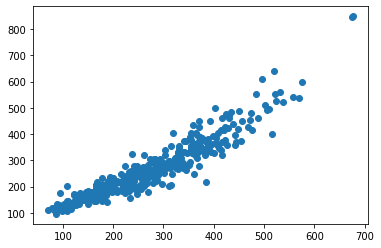

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
import pickle

In [ ]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)